In [1]:
import pymodwt.modwt
import numpy as np


In [83]:
# make a random signal with 128 points
x = np.random.randn(2048)
# x=np.zeros(128)
x[40:46] = 0.5*np.cos(3*np.pi*np.arange(40,46)/16. + 0.08)
wa,sc = pymodwt.modwt.modwt (x, boundary='periodic',wtf='la8')
de,sm = pymodwt.modwt.imodwt_mra(wa, sc)
war,scr = pymodwt.modwt.cir_shift(wa,sc,subtract_mean_VJ0t=True)
varw,vars = pymodwt.modwt.rot_cum_wav_svar(wa,sc)

c:\Users\21310917\OneDrive - The University of Western Australia\Code\pymodwt\pymodwt\modwt.py:184: RuntimeWarning: invalid value encountered in cast
  'BCs'      : np.int32(bw)
c:\Users\21310917\OneDrive - The University of Western Australia\Code\pymodwt\pymodwt\modwt.py:197: RuntimeWarning: invalid value encountered in cast
  'BCs'      : np.int32(bv)


In [84]:
ds_wr = wa.to_xarray({'name':np.arange(2048)})[0]
ds_scr = sc.to_xarray({'name':np.arange(2048)})

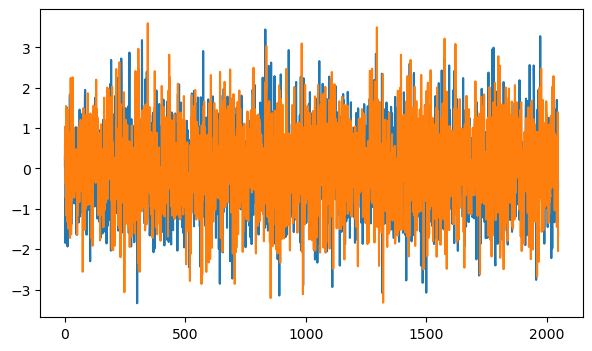

In [85]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(7,4))

axes.plot(np.arange(2048),x)
axes.plot(ds_wr['name'].values,ds_wr.sum('j').values + ds_scr.values ) #

In [86]:
np.var(x)

1.037982181838744

In [89]:
(ds_wr**2).sum('j').mean() #+ (ds_scr**2).sum('name')

<xarray.DataArray ()>
array(1.0346643)

In [6]:
ds_s = sc.to_xarray({'name':np.arange(128)})

In [7]:
ds_s

<xarray.DataArray (name: 128)>
array([-6.42430912e-04, -5.30527634e-04, -2.82325998e-04, -6.99414620e-05,
        5.65522338e-05,  1.25325364e-04,  1.61891346e-04,  1.81643365e-04,
        1.72108909e-04,  1.23624886e-04,  5.79829172e-05,  9.24305404e-06,
       -1.16770870e-05, -1.08532251e-05, -3.96651034e-07,  5.49658585e-06,
        5.14992856e-06,  2.93901406e-06,  7.59286546e-07, -7.86884777e-08,
        4.11852696e-08,  8.12542563e-08,  1.56445724e-08,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.29175537e-07,  2.68357820e-06,  2.88542629e-06, -1.37261701e-05,
       -5.08722194e-05, -9.80494559e-05, -1.11392423e-04, -8.03055238e-06,
        2.36586335e-04,  5.72332119e-04,  9.21382763e-04,  1.22093842e-03,
        1.44062842e-03,  1.54545483e-03,  1.38376536e-03,  6.66171716e-04,
       -7.18709286e-04, -2.64790506e-03, -4.80378978e-03, -6.76269772e-03,
       -8.37981887e-03, -9.70769388e-03, -1.08859003e-02, -1.21485454e-02,
       -1.35036909e-02, -1.47395166e-02, -1.56427271e-02, -1.61032229e-02,
       -1.60253575e-02, -1.52193464e-02, -1.30273974e-02, -8.25016817e-03,
       -4.32254467e-04,  9.93354038e-03,  2.16660558e-02,  3.32770708e-02,
        4.42612465e-02,  5.47434101e-02,  6.48568792e-02,  7.47209545e-02,
        8.41464777e-02,  9.28175776e-02,  1.00686982e-01,  1.07969375e-01,
        1.14611267e-01,  1.20228234e-01,  1.23731378e-01,  1.23243141e-01,
        1.18074894e-01,  1.08959960e-01,  9.75560536e-02,  8.58983902e-02,
        7.46604203e-02,  6.36839485e-02,  5.29799444e-02,  4.27806398e-02,
        3.34580550e-02,  2.51857670e-02,  1.76021662e-02,  1.00292900e-02,
        2.35782026e-03, -5.04666325e-03, -1.13476687e-02, -1.52148515e-02,
       -1.62058183e-02, -1.48188722e-02, -1.20537803e-02, -9.10361250e-03,
       -6.34896836e-03, -3.69636902e-03, -1.24083435e-03,  7.03149753e-04,
        1.86683750e-03,  2.25841306e-03,  2.28074764e-03,  2.52062436e-03,
        3.12603336e-03,  3.93389897e-03,  4.66500076e-03,  4.94104809e-03,
        4.67643452e-03,  4.01395247e-03,  3.14157697e-03,  2.26231680e-03,
        1.43665427e-03,  6.52591488e-04, -3.13152891e-05, -4.86680119e-04])
Coordinates:
  * name     (name) int32 0 1 2 3 4 5 6 7 8 ... 120 121 122 123 124 125 126 127
Attributes:
    Transform:  MODWT
    WTF:        LA8
    N:          128
    NW:         128
    J0:         4
    Boundary:   periodic
    Aligned:    False
    RetainVJ:   False
    Type:       Scaling
    BCs:        [        104 -2147483648]

In [4]:
np.var(x)

0.005013020329997321

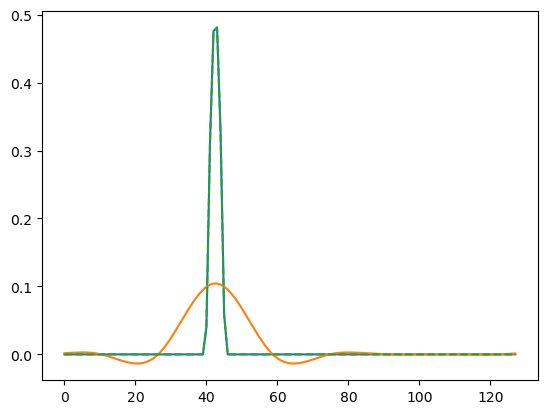

In [11]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots()
axes.plot(x)

axes.plot(sm)
axes.plot(sm + de.sum(axis=0),ls='--')